In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from scipy.optimize import curve_fit

In [6]:
rsun = 8.34 # kpc
vsun = 240 # km/s

In [26]:
long_list = [73.58, 64.06, 57.07, 51.20, 46.22, 41.26, 36.84, 32.65, 28.66, 24.81, 21.08, 17.44, 13.88] # deg
wco_list = [9.98, 6.80, 12.48, 25.45, 23.73, 26.31, 27.87, 48.01, 50.61, 48.28, 13.49, 4.79, 4.38]
wco_err_list = [.15,.15,.15,.15,.15,.15,.15,.15,.15,.15,.15,.15,.15/np.sqrt(15)]
radius_list = [rsun*np.sin(np.pi/180*long) for long in long_list]

<ErrorbarContainer object of 3 artists>

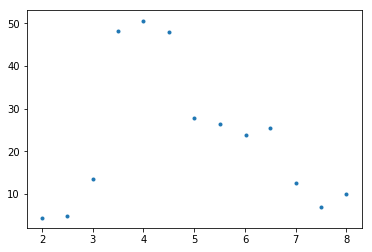

In [30]:
plt.errorbar(radius_list, wco_list, wco_err_list,fmt='.')

In [10]:
def expdisk(r, rd, const):
    return const * np.exp(-r/rd)

In [24]:
popt, pcov = curve_fit(expdisk, radius_list[:-3], wco_list[:-3], p0 = [4, 100])
popt

array([  2.83121397, 189.75390781])

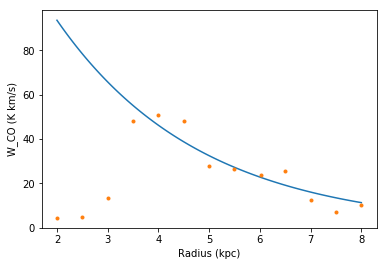

In [33]:
radii = np.linspace(2,8,100)
plt.plot(radii, expdisk(radii, *popt))
plt.errorbar(radius_list, wco_list, wco_err_list,fmt='.')
plt.xlabel('Radius (kpc)')
plt.ylabel('W_CO (K km/s)')
plt.savefig('imgs/wco_plot.png')

In [ ]:
"